In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.layers import Dense,Flatten, MaxPooling2D,Conv2D,Dropout
from keras.models import Sequential
import os
from PIL import Image
import random
import matplotlib.pyplot as plt

In [5]:
data= pd.read_excel('Cases Meta data.xlsx')
data.head()

,CaseNumber,CaseID,SCJ,SCJ Location,Acitowhite area,Acitowhite area color,Acitowhite area margin,Acitowhite area surface,Acitowhite area location,Acitowhite area size,VIA,Eligibility for ablative treatment,Histology findings
0,1,AFC,Fully visible,On ectocervix,Present,Thin,Diffuse,Smooth,Within TZ or close to the external os (if SCJ ...,Covering more than 75% of ectocervix,Negative,Eligible for ablation,Not done
1,2,AJL,Fully visible,On ectocervix,Absent,NaN,NaN,NaN,NaN,NaN,Negative,Eligible for ablation,Not done
2,3,AGY,Partially visible,Partly on ectocervix and partly on endocervix,Absent,NaN,NaN,NaN,NaN,NaN,Negative,Eligible for ablation,Not done
3,4,AJE,Fully visible,On ectocervix,Absent,NaN,NaN,NaN,NaN,NaN,Negative,Eligible for ablation,Not done
4,5,AHS,Fully visible,On ectocervix,Absent,NaN,NaN,NaN,NaN,NaN,Negative,Eligible for ablation,Not done


In [6]:
df = data[["CaseID", "VIA"]]


In [7]:
df=df.sort_values(by="CaseID")
df

,CaseID,VIA
86,AAA,Negative
147,AAB,Positive
180,AAC,Suspicious of cancer
96,AAD,Positive
123,AAE,Positive
...,...,...
44,APF,Negative
49,API,Negative
55,APT,Negative
56,APV,Negative


In [8]:


# Step 1: Create a list of file paths
image_dir = 'D:\coding\PRML\hobby\cervical cancer\Train'  # Replace with your image directory
file_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir)]
print(file_paths[184])

D:\coding\PRML\hobby\cervical cancer\Train\APV1.jpg


In [9]:
df2= pd.read_excel('Cases - Images.xlsx')
df2

,CaseNumber,File,Type
0,1,AFC0.jpg,Before application of acetic acid
1,1,AFC1.jpg,After application of acetic acid
2,2,AJL0.jpg,Before application of acetic acid
3,2,AJL1.jpg,After application of acetic acid
4,3,AGY0.jpg,Before application of acetic acid
...,...,...,...
415,184,AEU1.jpg,After application of acetic acid
416,185,ADF0.jpg,Before application of acetic acid
417,185,ADF1.jpg,After application of acetic acid
418,186,ABK0.jpg,Before application of acetic acid


In [11]:

# Assuming you have a DataFrame 'df' with 'CaseID' column

# Step 1: Create a list of valid image file paths
image_dir = 'D:/coding/PRML/hobby/cervical cancer/Train'  # Replace with your image directory
valid_image_paths = []

# Create a list of indices to drop
indices_to_drop = []

for i, case_id in enumerate(df['CaseID']):
    image_filename = f"{case_id}1.jpg"  # Assuming images are named as 'caseID1.jpg'
    image_path = os.path.join(image_dir, image_filename)
    
    if os.path.exists(image_path):
        valid_image_paths.append(image_path)
    else:
        indices_to_drop.append(i)

# Drop rows with missing images
df = df.drop(index=indices_to_drop)

# Add the "Path" column to the DataFrame
df["Path"] = valid_image_paths

# Display the updated DataFrame
print(df.head())


    CaseID                   VIA  \
86     AAA              Negative   
147    AAB              Positive   
180    AAC  Suspicious of cancer   
96     AAD              Positive   
123    AAE              Positive   

                                                  Path  
86   D:/coding/PRML/hobby/cervical cancer/Train\AAA...  
147  D:/coding/PRML/hobby/cervical cancer/Train\AAB...  
180  D:/coding/PRML/hobby/cervical cancer/Train\AAC...  
96   D:/coding/PRML/hobby/cervical cancer/Train\AAD...  
123  D:/coding/PRML/hobby/cervical cancer/Train\AAE...  


In [34]:
df["Image"]=df["Path"].map(lambda x: np.asarray(Image.open(x).resize((96,72))))
df

,CaseID,VIA,Path,Image
86,AAA,Negative,D:/coding/PRML/hobby/cervical cancer/Train\AAA...,"[[[210, 84, 34], [207, 83, 34], [197, 68, 29],..."
147,AAB,Positive,D:/coding/PRML/hobby/cervical cancer/Train\AAB...,"[[[105, 40, 24], [118, 45, 31], [114, 49, 31],..."
180,AAC,Suspicious of cancer,D:/coding/PRML/hobby/cervical cancer/Train\AAC...,"[[[104, 82, 62], [122, 89, 66], [121, 89, 67],..."
96,AAD,Positive,D:/coding/PRML/hobby/cervical cancer/Train\AAD...,"[[[100, 56, 9], [110, 69, 22], [123, 86, 47], ..."
123,AAE,Positive,D:/coding/PRML/hobby/cervical cancer/Train\AAE...,"[[[66, 26, 11], [46, 7, 4], [45, 13, 3], [65, ..."
...,...,...,...,...
44,APF,Negative,D:/coding/PRML/hobby/cervical cancer/Train\APB...,"[[[140, 113, 92], [146, 112, 83], [145, 109, 8..."
49,API,Negative,D:/coding/PRML/hobby/cervical cancer/Train\APF...,"[[[252, 194, 159], [252, 192, 159], [254, 196,..."
55,APT,Negative,D:/coding/PRML/hobby/cervical cancer/Train\API...,"[[[158, 101, 51], [161, 103, 57], [162, 100, 5..."
56,APV,Negative,D:/coding/PRML/hobby/cervical cancer/Train\APT...,"[[[126, 102, 74], [139, 108, 74], [131, 99, 66..."


In [35]:
df["Image"][1].shape

(72, 96, 3)

In [36]:
X_train,X_test,Y_train,Y_test= train_test_split(df["Image"],df["VIA"],test_size=0.2, random_state= 42)
X_train.head()

62     [[[138, 95, 62], [147, 100, 65], [161, 113, 76...
151    [[[251, 255, 254], [128, 192, 150], [5, 61, 11...
169    [[[39, 13, 6], [30, 2, 1], [33, 4, 2], [39, 5,...
174    [[[25, 4, 11], [21, 3, 9], [1, 0, 0], [0, 0, 0...
71     [[[133, 89, 112], [131, 84, 108], [117, 84, 10...
Name: Image, dtype: object

In [38]:

# Convert X_train from a Pandas Series to a NumPy array
X_train = np.array(X_train.tolist())

# Assuming your images are grayscale and have a shape (72, 96)
height, width, channels = 72, 96,3  # Update channels to 3 if using RGB images

# Reshape X_train
X_train = X_train.reshape(-1, height, width, channels)

# Normalize X_train
X_train = X_train / 255.0  # Normalize pixel values to [0, 1]



In [39]:
# Convert X_train from a Pandas Series to a NumPy array
X_test = np.array(X_test.tolist())

# Assuming your images are grayscale and have a shape (72, 96)
height, width, channels = 72, 96,3  # Update channels to 3 if using RGB images

# Reshape X_train
X_test = X_test.reshape(-1, height, width, channels)

# Normalize X_train
X_test= X_test / 255.0  # Normalize pixel values to [0, 1]


In [40]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the labels in Y_train
Y_train_encoded = label_encoder.fit_transform(Y_train)

In [41]:
Y_test_encoded = label_encoder.fit_transform(Y_test)

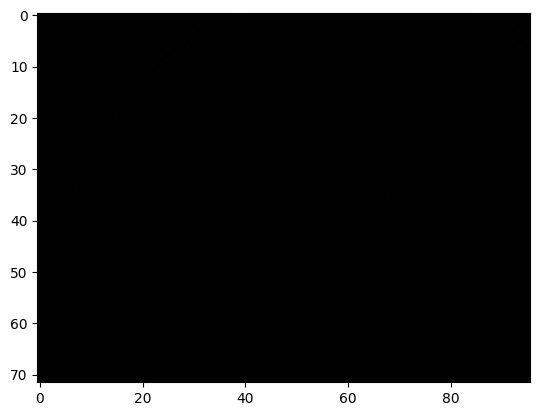

In [49]:
rand=random.randint(0,len(X_train))
plt.imshow(X_train[rand])

In [50]:
model=Sequential([Conv2D(256,(3,3),activation='relu',input_shape=(72,96,3)),
                  MaxPooling2D((2,2)),
                  Dropout(0.3),
                  Flatten(),
                  Dense(64,activation='relu'),
                  Dense(1, activation='sigmoid')
                 ])

In [51]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
model.fit(X_train,Y_train_encoded,epochs = 10, batch_size= 64)

Epoch 1/10
3/3 [==============================] - 5s 1s/step - loss: 0.6834 - accuracy: 0.4218
Epoch 2/10
3/3 [==============================] - 4s 1s/step - loss: 0.6978 - accuracy: 0.4014
Epoch 3/10
3/3 [==============================] - 4s 1s/step - loss: 0.6819 - accuracy: 0.4014
Epoch 4/10
1/3 [=========>....................] - ETA: 3s - loss: 0.6676 - accuracy: 0.4375

KeyboardInterrupt: 

In [47]:
model.evaluate(X_test,Y_test_encoded)

2/2 [==============================] - 1s 65ms/step - loss: 4.5471 - accuracy: 0.4054


[4.547085762023926, 0.4054054021835327]